In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_merge = pd.merge(ride_data_df, city_data_df, on="city")

# Display the data table for preview
pyber_merge.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

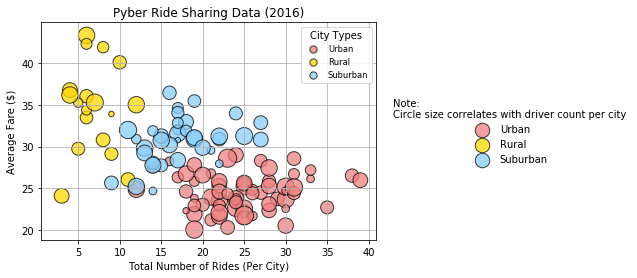

In [103]:
# Obtain the x and y coordinates for each of the three city types
city_grp_urban = pyber_merge.loc[pyber_merge["type"] == "Urban"]
city_grp_rural = pyber_merge.loc[pyber_merge["type"] == "Rural"]
city_grp_suburban = pyber_merge.loc[pyber_merge["type"] == "Suburban"]
driver_count = pyber_merge.groupby("city").count()["driver_count"]

urban_count = city_grp_urban.groupby("city").count()['ride_id']
fare_urban_avg = city_grp_urban.groupby("city").mean()['fare']

rural_count = city_grp_rural.groupby("city").count()['ride_id']
fare_rural_avg = city_grp_rural.groupby("city").mean()['fare']

suburban_count = city_grp_suburban.groupby("city").count()['ride_id']
fare_suburban_avg = city_grp_suburban.groupby("city").mean()['fare']


# Build the scatter plots for each city types
plt.scatter(urban_count, fare_urban_avg, marker="o", facecolors="lightcoral", edgecolors="black",s=10*(driver_count), alpha=0.75, label="Urban")
plt.scatter(rural_count, fare_rural_avg, marker="o", facecolors="gold", edgecolors="black",s=10*(driver_count), alpha=0.75, label="Rural")
plt.scatter(suburban_count, fare_suburban_avg, marker="o", facecolors="lightskyblue", edgecolors="black",s=10*(driver_count), alpha=0.75, label="Suburban")
plt.grid()
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
#fig, ax = plt.subplots()
leg1 = plt.legend(title='City Types', loc="best", fontsize="small", fancybox=True, markerscale=.5)
plt.gca().add_artist(leg1)

# Incorporate a text label regarding circle size
plt.legend(title="Note:\nCircle size correlates with driver count per city", bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, frameon=False)


# Save Figure
plt.show()

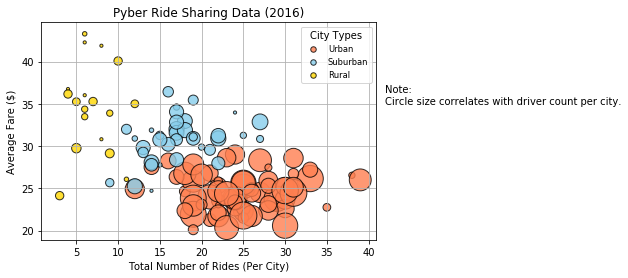

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

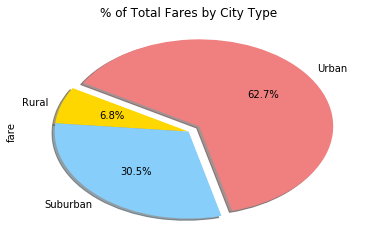

In [20]:
# Calculate Type Percents
fare_grpby = pyber_merge.groupby("type")
fare_count = fare_grpby["fare"].sum()

# Build Pie Chart
colors = ['Gold', 'lightskyblue', 'lightcoral']
plt.title("% of Total Fares by City Type")
fare_count.plot(kind="pie", colors=colors, autopct="%1.1f%%",
                          explode=(0, 0, .1), shadow=True, startangle=150)

# Save Figure
plt.savefig("../Images/Ride.png")

# Show Figure
plt.show()

## Total Rides by City Type

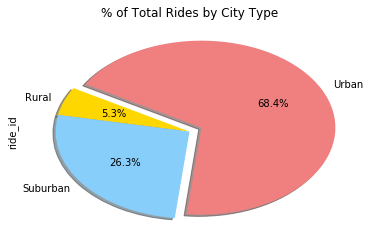

In [22]:
# Calculate Ride Percents
ride_grpby = pyber_merge.groupby("type")
ride_count = ride_grpby["ride_id"].count()


# Build Pie Chart
colors = ['Gold', 'lightskyblue', 'lightcoral']
plt.title("% of Total Rides by City Type")
ride_count.plot(kind="pie", colors=colors, autopct="%1.1f%%",
                          explode=(0, 0, .1), shadow=True, startangle=150)
# Save Figure
plt.savefig("../Images/Ride.png")

# Show Figure
plt.show()

## Total Drivers by City Type

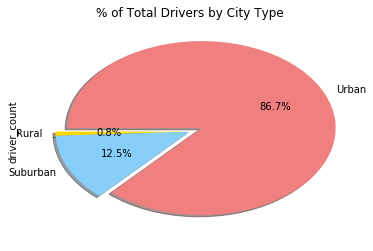

In [24]:
# Calculate Driver Percents
driver_grpby = pyber_merge.groupby("type")
driver_count = driver_grpby["driver_count"].sum()

# Build Pie Charts
colors = ['Gold', 'lightskyblue', 'lightcoral']
plt.title("% of Total Drivers by City Type")
driver_pie = driver_count.plot(kind="pie", colors=colors, autopct="%1.1f%%",
                          explode=(0, 0, 0.1), shadow=True, startangle=180)
# Save Figure
plt.savefig("../Images/Ride.png")

# Show Figure
plt.show()